In [1]:
import numpy as np

from src import *

In [2]:
survey = pd.read_excel('./data/raw/NARIG_Survey.xlsx', usecols='A:EG')
column_names = pd.read_json('./data/processed/json/column_names.json', typ='series')

survey.rename(columns=column_names, inplace=True)
survey.replace(replace_map, inplace=True)
survey.replace(ordinal_map, inplace=True)

survey['age'] = survey['age'].replace(0, np.nan)
survey['gender'] = survey['gender'].str.split().str[-1]

orig_col_order = list(survey.columns)

demographic_cols = survey.columns[:12].tolist()
attitude_cols = survey.columns[12:20].tolist()
knowledge_cols = survey.columns[20:25].tolist()
practice_cols = survey.columns[25:30].tolist()
# vc_performance_cols = survey.columns[30:-6].tolist()
performance_cols = survey.columns[-6:].tolist()

value_chains = list(survey['value_chain'].unique())

narig_dfs = {vc: survey[survey['value_chain'] == vc].dropna(axis=1, how='all') for vc in value_chains}

for k, v in narig_dfs.items():
    v.columns = v.columns.str.replace('_\d', '', regex=True)
    v.dropna(axis=0, inplace=True)

narig_dfs['survey_df'] = pd.concat(narig_dfs.values(), ignore_index=True)
narig_dfs['survey_df'] = narig_dfs['survey_df'][[col for col in orig_col_order if col in narig_dfs['survey_df'].columns]]

narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], attitude_cols, 'attitude', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], knowledge_cols, 'knowledge', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], practice_cols, 'practice', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], performance_cols, 'project_performance', drop_features=False)

for k, v in narig_dfs.items():
    for col in v.select_dtypes('object').columns:
        v[col] = v[col].astype('category')
    for col in v.select_dtypes('float').columns:
        if v[col].apply(float.is_integer).all():
            v[col] = v[col].astype(int)
    # print(k)

narig_dfs['survey_df']

,ward,gender,age,education,monthly_income,household_size,family_head,value_chain,vc_experience,project_skepticism,...,adopted_hygiene_management,enterprise_profitability_increase,farm_productivity_increase,timely_implementation,new_income_streams,job_creation_increase,project_inclusivity,attitude,knowledge,project_performance
0,Tulimani,Male,64,Secondary,30000,3,Yes,Tomato,40,5,...,NaN,0.881749,1.003392,-0.653221,1.082994,1.070872,0.969843,-2.842073,-1.169291,-1.830068
1,Tulimani,Male,67,Secondary,20000,4,Yes,Tomato,20,5,...,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.842073,-2.070367,-2.502048
2,Tulimani,Female,33,Primary,5000,3,No,Tomato,5,5,...,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.842073,-2.070367,-2.502048
3,Tulimani,Female,73,Primary,800,6+,No,Tomato,2,5,...,NaN,0.881749,1.003392,-0.653221,1.082994,1.070872,0.969843,-2.842073,-2.070367,-1.830068
4,Tulimani,Male,71,Secondary,10000,5,Yes,Tomato,5,5,...,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.842073,-2.370247,-2.502048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mtito Andei,Female,85,Primary,16000,6+,No,Indigenous chicken,18,3,...,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,1.939245,1.861911,1.831304
331,Mtito Andei,Female,54,Primary,14000,6+,Yes,Indigenous chicken,15,3,...,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,1.939245,1.861911,1.831304
332,Mtito Andei,Female,60,Primary,16000,6+,Yes,Indigenous chicken,20,3,...,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,2.524271,1.861911,1.831304
333,Mtito Andei,Female,62,Primary,4500,5,No,Indigenous chicken,6,5,...,Yes,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.842073,-2.370247,-2.502048


In [3]:
# PRint value with less than 1
for col in narig_dfs['survey_df'].loc[:, 'vc_experience':].columns:
    print(col)
    print(narig_dfs['survey_df'][col].value_counts(normalize=True, dropna=False))
    print()

vc_experience
vc_experience
5     0.268657
4     0.244776
10    0.065672
3     0.062687
6     0.059701
15    0.047761
20    0.047761
2     0.035821
8     0.035821
7     0.026866
1     0.017910
25    0.014925
9     0.011940
18    0.008955
30    0.005970
19    0.005970
12    0.005970
14    0.002985
35    0.002985
16    0.002985
50    0.002985
40    0.002985
17    0.002985
43    0.002985
27    0.002985
26    0.002985
13    0.002985
11    0.002985
Name: proportion, dtype: float64

project_skepticism
project_skepticism
5    0.519403
4    0.328358
3    0.104478
2    0.047761
Name: proportion, dtype: float64

adequate_consultation
adequate_consultation
4    0.522388
5    0.471642
3    0.005970
Name: proportion, dtype: float64

project_acceptance
project_acceptance
4    0.585075
5    0.402985
3    0.011940
Name: proportion, dtype: float64

satisfactory_training
satisfactory_training
 0.997159    0.498507
-0.979458    0.498507
-2.956074    0.002985
Name: proportion, dtype: float64

project_succ

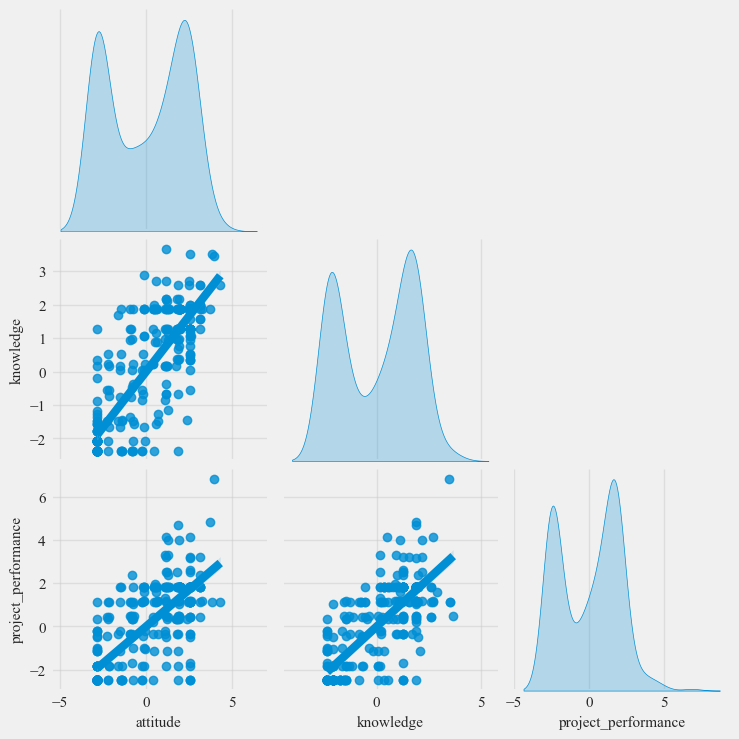

In [4]:
# engineer a feature
ndf = narig_dfs['survey_df'].copy()

ndf = ndf[['attitude', 'knowledge', 'project_performance']]

sns.pairplot(ndf, diag_kind='kde', kind='reg', corner=True)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox


def arcsinsqrt(x):
    return np.arcsin(np.sqrt(x))


def logit(x):
    return np.log(x / (1 - x))


def hlog(x):
    return np.log(((1+x)/(1-x))) * 0.5


scaler = StandardScaler()

new_df = narig_dfs['survey_df'].copy()

new_df = new_df[['attitude', 'knowledge', 'project_performance']]

new_df.loc[:, 'bc_attitude'], _ = boxcox(new_df['attitude'])
new_df.loc[:, 'bc_knowledge'], _ = boxcox(new_df['knowledge'])
new_df.loc[:, 'bc_project_performance'], _ = boxcox(new_df['project_performance'])

new_df.loc[:, 'sr_attitude'] = np.sqrt(new_df['attitude'])
new_df.loc[:, 'sr_knowledge'] = np.sqrt(new_df['knowledge'])
new_df.loc[:, 'sr_project_performance'] = np.sqrt(new_df['project_performance'])

new_df.loc[:, 'log_attitude'] = np.log(new_df['attitude'])
new_df.loc[:, 'log_knowledge'] = np.log(new_df['knowledge'])
new_df.loc[:, 'log_project_performance'] = np.log(new_df['project_performance'])

# new_df.loc[:, 'as_attitude'] = arcsinsqrt(new_df['attitude'])
# new_df.loc[:, 'as_knowledge'] = arcsinsqrt(new_df['knowledge'])
# new_df.loc[:, 'as_project_performance'] = arcsinsqrt(new_df['project_performance'])

new_df.loc[:, 'logit_attitude'] = logit(new_df['attitude'])
new_df.loc[:, 'logit_knowledge'] = logit(new_df['knowledge'])
new_df.loc[:, 'logit_project_performance'] = logit(new_df['project_performance'])

new_df.loc[:, 'hlog_attitude'] = hlog(new_df['attitude'])
new_df.loc[:, 'hlog_knowledge'] = hlog(new_df['knowledge'])
new_df.loc[:, 'hlog_project_performance'] = hlog(new_df['project_performance'])

fig, ax = plt.subplots(7, 3, figsize=(12, 28), sharey=True)

sns.histplot(data=new_df, x='attitude', kde=True, ax=ax[0,0])
sns.histplot(data=new_df, x='knowledge', kde=True, ax=ax[0,1])
sns.histplot(data=new_df, x='project_performance', kde=True, ax=ax[0,2])

sns.histplot(data=new_df, x='bc_attitude', kde=True, ax=ax[1,0])
sns.histplot(data=new_df, x='bc_knowledge', kde=True, ax=ax[1,1])
sns.histplot(data=new_df, x='bc_project_performance', kde=True, ax=ax[1,2])

sns.histplot(data=new_df, x='sr_attitude', kde=True, ax=ax[2,0])
sns.histplot(data=new_df, x='sr_knowledge', kde=True, ax=ax[2,1])
sns.histplot(data=new_df, x='sr_project_performance', kde=True, ax=ax[2,2])

sns.histplot(data=new_df, x='log_attitude', kde=True, ax=ax[3,0])
sns.histplot(data=new_df, x='log_knowledge', kde=True, ax=ax[3,1])
sns.histplot(data=new_df, x='log_project_performance', kde=True, ax=ax[3,2])

sns.histplot(data=new_df, x='as_attitude', kde=True, ax=ax[4,0])
sns.histplot(data=new_df, x='as_knowledge', kde=True, ax=ax[4,1])
sns.histplot(data=new_df, x='as_project_performance', kde=True, ax=ax[4,2])

sns.histplot(data=new_df, x='logit_attitude', kde=True, ax=ax[5,0])
sns.histplot(data=new_df, x='logit_knowledge', kde=True, ax=ax[5,1])
sns.histplot(data=new_df, x='logit_project_performance', kde=True, ax=ax[5,2])

sns.histplot(data=new_df, x='hlog_attitude', kde=True, ax=ax[6,0])
sns.histplot(data=new_df, x='hlog_knowledge', kde=True, ax=ax[6,1])
sns.histplot(data=new_df, x='hlog_project_performance', kde=True, ax=ax[6,2])


fig.suptitle('Distribution of the features across the clusters', fontsize=16)

ax[0,0].set_title('Attitude')
ax[0,1].set_title('Knowledge')
ax[0,2].set_title('Project Performance')

ax[1,0].set_title('Boxcox Attitude')
ax[1,1].set_title('Boxcox Knowledge')
ax[1,2].set_title('Boxcox Project Performance')

ax[2,0].set_title('Square Root Attitude')
ax[2,1].set_title('Square Root Knowledge')
ax[2,2].set_title('Square Root Project Performance')

plt.show()

ValueError: Data must be positive.

In [ ]:


scaled_df = scaler.fit_transform(new_df)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")

kmeans.fit(scaled_df)

cluster_df = new_df.copy()

new_df['cluster'] = kmeans.labels_

new_df.loc[:, 'cluster'] = new_df['cluster'].astype('category')

# Rename the cluster labels
new_df['cluster'] = new_df['cluster'].replace({0: 'cluster_1', 1: 'cluster_2'})
 
# fig, ax = plt.subplots(4, 3, figsize=(12, 16), sharey=True)
# 
# sns.histplot(data=new_df, x='attitude', hue='cluster', kde=True, ax=ax[0,0])
# sns.histplot(data=new_df, x='knowledge', hue='cluster', kde=True, ax=ax[0,1])
# sns.histplot(data=new_df, x='project_performance', hue='cluster', kde=True, ax=ax[0,2])
# 
# sns.histplot(data=new_df, x='bc_attitude', hue='cluster', kde=True, ax=ax[1,0])
# sns.histplot(data=new_df, x='bc_knowledge', hue='cluster', kde=True, ax=ax[1,1])
# sns.histplot(data=new_df, x='bc_project_performance', hue='cluster', kde=True, ax=ax[1,2])
# 
# sns.histplot(data=new_df, x='sr_attitude', hue='cluster', kde=True, ax=ax[2,0])
# sns.histplot(data=new_df, x='sr_knowledge', hue='cluster', kde=True, ax=ax[2,1])
# sns.histplot(data=new_df, x='sr_project_performance', hue='cluster', kde=True, ax=ax[2,2])
# 
# fig.suptitle('Distribution of the features across the clusters', fontsize=16)
# 
# ax[0,0].set_title('Attitude')
# ax[0,1].set_title('Knowledge')
# ax[0,2].set_title('Project Performance')
# 
# ax[1,0].set_title('Boxcox Attitude')
# ax[1,1].set_title('Boxcox Knowledge')
# ax[1,2].set_title('Boxcox Project Performance')
# 
# ax[2,0].set_title('Square Root Attitude')
# ax[2,1].set_title('Square Root Knowledge')
# ax[2,2].set_title('Square Root Project Performance')
# 
# plt.show()

# sns.pairplot(cluster_df, diag_kind='kde', kind='reg', hue='cluster', corner=True)
# plt.show()

cluster1 = new_df[new_df['cluster'] == 'cluster_1'].drop(columns='cluster')
cluster2 = new_df[new_df['cluster'] == 'cluster_2'].drop(columns='cluster')

# Perform boxcox transformation on the features
cluster1.loc[:, 'bc_attitude'], _ = boxcox(cluster1['attitude'])
cluster1.loc[:, 'bc_knowledge'], _ = boxcox(cluster1['knowledge'])
cluster1.loc[:, 'bc_project_performance'], _ = boxcox(cluster1['project_performance'])

cluster2.loc[:, 'bc_attitude'], _ = boxcox(cluster2['attitude'])
cluster2.loc[:, 'bc_knowledge'], _ = boxcox(cluster2['knowledge'])
cluster2.loc[:, 'bc_project_performance'], _ = boxcox(cluster2['project_performance'])

fig, ax = plt.subplots(4, 3, figsize=(12, 16), sharey=True)

sns.histplot(data=cluster1, x='attitude', kde=True, ax=ax[0, 0])
sns.histplot(data=cluster1, x='knowledge', kde=True, ax=ax[0, 1])
sns.histplot(data=cluster1, x='project_performance', kde=True, ax=ax[0, 2])

sns.histplot(data=cluster1, x='bc_attitude', kde=True, ax=ax[1, 0])
sns.histplot(data=cluster1, x='bc_knowledge', kde=True, ax=ax[1, 1])
sns.histplot(data=cluster1, x='bc_project_performance', kde=True, ax=ax[1, 2])

sns.histplot(data=cluster1, x='sr_attitude', kde=True, ax=ax[2, 0])
sns.histplot(data=cluster1, x='sr_knowledge', kde=True, ax=ax[2, 1])
sns.histplot(data=cluster1, x='sr_project_performance', kde=True, ax=ax[2, 2])

fig.suptitle('Distribution of the features in cluster 1', fontsize=16)

ax[0,0].set_title('Attitude')
ax[0,1].set_title('Knowledge')
ax[0,2].set_title('Project Performance')

ax[1,0].set_title('Boxcox Attitude')
ax[1,1].set_title('Boxcox Knowledge')
ax[1,2].set_title('Boxcox Project Performance')

ax[2,0].set_title('Square Root Attitude')
ax[2,1].set_title('Square Root Knowledge')
ax[2,2].set_title('Square Root Project Performance')

plt.show()

fig, ax = plt.subplots(4, 3, figsize=(12, 16), sharey=True)

sns.histplot(data=cluster2, x='attitude', kde=True, ax=ax[0, 0])
sns.histplot(data=cluster2, x='knowledge', kde=True, ax=ax[0, 1])
sns.histplot(data=cluster2, x='project_performance', kde=True, ax=ax[0, 2])

sns.histplot(data=cluster2, x='bc_attitude', kde=True, ax=ax[1, 0])
sns.histplot(data=cluster2, x='bc_knowledge', kde=True, ax=ax[1, 1])
sns.histplot(data=cluster2, x='bc_project_performance', kde=True, ax=ax[1, 2])

fig.suptitle('Distribution of the features in cluster 2', fontsize=16)

ax[0,0].set_title('Attitude')
ax[0,1].set_title('Knowledge')
ax[0,2].set_title('Project Performance')

ax[1,0].set_title('Boxcox Attitude')
ax[1,1].set_title('Boxcox Knowledge')
ax[1,2].set_title('Boxcox Project Performance')

ax[2,0].set_title('Square Root Attitude')
ax[2,1].set_title('Square Root Knowledge')
ax[2,2].set_title('Square Root Project Performance')

plt.show()

In [ ]:
# Transform the features using boxcox
from scipy.stats import boxcox

# instantiate the boxcox object
sns.kdeplot(data=narig_dfs['survey_df'], x='attitude')
plt.show()
narig_dfs['survey_df']['attitude'], _ = boxcox(narig_dfs['survey_df']['attitude'])
sns.kdeplot(data=narig_dfs['survey_df'], x='attitude')
plt.show()

sns.kdeplot(data=narig_dfs['survey_df'], x='knowledge')
plt.show()
narig_dfs['survey_df']['knowledge'], _ = boxcox(narig_dfs['survey_df']['knowledge'])
sns.kdeplot(data=narig_dfs['survey_df'], x='knowledge')
plt.show()

sns.kdeplot(data=narig_dfs['survey_df'], x='practice')
plt.show()
narig_dfs['survey_df']['practice'], _ = boxcox(narig_dfs['survey_df']['practice'])
sns.kdeplot(data=narig_dfs['survey_df'], x='practice')
plt.show()

sns.kdeplot(data=narig_dfs['survey_df'], x='project_performance')
plt.show()
narig_dfs['survey_df']['project_performance'], _ = boxcox(narig_dfs['survey_df']['project_performance'])
sns.kdeplot(data=narig_dfs['survey_df'], x='project_performance')
plt.show()

In [ ]:
new_df = narig_dfs['survey_df'].copy()

new_df = new_df[['attitude', 'knowledge', 'practice', 'project_performance']]

corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.pairplot(new_df, diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


To use knn to find the two distinct clusters in a distribution, we need to follow the following steps:
1. Standardize the data
2. Find the optimal number of clusters using the elbow method
3. Use the optimal number of clusters to fit the knn model
4. Plot the clusters
5. Plot the distribution of the clusters
6. Plot the distribution of the features in the clusters
7. Plot the distribution of the features across the value chains

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

scaler = StandardScaler()

new_df = narig_dfs['survey_df'].copy()

new_df = new_df[['attitude', 'knowledge', 'project_performance']]

scaled_df = scaler.fit_transform(new_df)

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(scaled_df)

# Find the optimal number of clusters using the elbow method
knn = NearestNeighbors(n_neighbors=2)

knn.fit(scaled_df)

distances, indices = knn.kneighbors(scaled_df)

distances = np.sort(distances, axis=0)

distances = distances[:, 1]

plt.plot(distances)

knee = KneeLocator(range(0, len(distances)), distances, curve='convex', direction='decreasing')

knee.plot_knee()

plt.show()

# Plot the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans.labels_, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.show()

# Plot the distribution of the clusters
# sns.histplot(kmeans.labels_, kde=True)
# plt.show()

# Plot the distribution of the features in the clusters
for col in new_df.columns:
    sns.histplot(new_df[col], kde=True)
    plt.show()
    
    for i in range(kmeans.n_clusters):
        sns.histplot(new_df[col][kmeans.labels_ == i], kde=True)
        plt.show()
        

In [ ]:
kmeans.labels_

# create a new dataframe with the cluster labels
cluster_df = new_df.copy()

cluster_df['cluster'] = kmeans.labels_

cluster_df['cluster'] = cluster_df['cluster'].astype('category')

sns.pairplot(cluster_df, diag_kind='kde', kind='reg', hue='cluster', corner=True)

In [ ]:
def plot_distribution(dataframe, feature, by=None, histyle='dodge', violin=False, fh=4, hr=1, log=False, **kwargs):
    """
    Plot the distribution of a feature; histogram and KDE, boxplot/violin plot.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The dataframe containing the feature.
    feature : str
        The name of the feature.
    by : str, default None
        The name of the feature to group by.
    histyle : str, default 'dodge'
        The style of the histogram. Options are 'dodge' or 'stack'.
    violin : bool, default False
        Whether to plot a violin plot instead of a boxplot.
    fh : int, default 5
        The height of the figure.
    hr : int, default 1
        The height of the boxplot/violin plot axes.        
    **kwargs : dict
        Keyword arguments to pass to the seaborn plots.
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The figure containing the plots.
    ax : matplotlib.axes.Axes
        The axes containing the plots.
    """
    fig, ax = plt.subplots(2, 1, figsize=(6, fh),
                           gridspec_kw={'height_ratios': [7.5, hr]},
                           sharex=True)
    sns.histplot(data=dataframe, x=feature, kde=True, hue=by, multiple=histyle, ax=ax[0], shrink=0.8, log_scale=log, **kwargs)
    if violin:
        sns.violinplot(data=dataframe, x=feature, y=by, ax=ax[1], **kwargs)
    else:
        sns.boxplot(data=dataframe, x=feature, y=by, ax=ax[1], width=0.5, **kwargs)
    ax[1].set_ylabel('')
    ax[1].set_xlabel(feature.replace('_', ' ').title())
    return fig, ax

# for col in narig_dfs['survey_df'].loc[:, 'vc_experience':].columns:
#     print(col)
#     fig, ax = plot_distribution(narig_dfs, col, by='value_chain', histyle='dodge', violin=True, fh=4, hr=1, log=False)
#     plt.show()

plotting_cols = ['attitude', 'knowledge', 'practice', 'project_performance']
cats = narig_dfs['survey_df'].iloc[:, :9].select_dtypes('category').columns.tolist()

for col in plotting_cols:
    fig, ax = plot_distribution(narig_dfs['survey_df'], col, log=False)
    ax[0].set_title(col.replace('_', ' ').title())
    ax[1].set_xlabel('')
    plt.show()
    
    # fig, ax = plot_distribution(narig_dfs['survey_df'], col, log=True)
    # ax[0].set_title(col.replace('_', ' ').title())
    # ax[1].set_xlabel('')
    # plt.show()
    
    for cat in cats:
        n = narig_dfs['survey_df'][cat].nunique()
        palette = sns.color_palette('tab10', n)
        
        fig, ax = plot_distribution(narig_dfs['survey_df'], col, by=cat, fh=2.5+n, hr=0.5*n, log=False, palette=palette)
        ax[0].set_title(col.replace('_', ' ').title() + f" across {cat.replace('_', ' ').title()}")
        ax[1].set_xlabel('')
        plt.show()
        
        # fig, ax = plot_distribution(narig_dfs['survey_df'], col, by=cat, fh=2.5+n, hr=0.5*n, log=True, palette=palette)
        # ax[0].set_title(col.replace('_', ' ').title() + f" across {cat.replace('_', ' ').title()}")
        # ax[1].set_xlabel('')
        # plt.show()
    
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'attitude', histyle='dodge', violin=False, fh=4, hr=1, log=False)
# plt.show()
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'attitude', histyle='dodge', violin=False, fh=4, hr=1, log=True)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'knowledge', histyle='dodge', violin=False, fh=4, hr=1, log=False)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'knowledge', histyle='dodge', violin=False, fh=4, hr=1, log=True)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'practice', histyle='dodge', violin=False, fh=4, hr=1, log=False)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'practice', histyle='dodge', violin=False, fh=4, hr=1, log=True)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'project_performance', histyle='dodge', violin=False, fh=4, hr=1, log=False)
# plt.show()
# 
# fig, ax = plot_distribution(narig_dfs['survey_df'], 'project_performance', histyle='dodge', violin=False, fh=4, hr=1, log=True)
# plt.show()

In [ ]:
# Plot kde plot using sns
sns.kdeplot(data=narig_dfs['survey_df'], x='attitude' , log_scale=True)

In [ ]:
sns.kdeplot(data=narig_dfs['survey_df'], x='knowledge', log_scale=True)  

In [ ]:
sns.kdeplot(data=narig_dfs['survey_df'], x='project_performance', log_scale=True)

In [ ]:
def arcsinsqrt(x):
    return np.arcsin(np.sqrt(x))

narig_dfs['survey_df']['attitude'] = narig_dfs['survey_df']['attitude'].apply(arcsinsqrt)

narig_dfs['survey_df']['knowledge'] = narig_dfs['survey_df']['knowledge'].apply(arcsinsqrt)

narig_dfs['survey_df']['practice'] = narig_dfs['survey_df']['practice'].apply(arcsinsqrt)

narig_dfs['survey_df']['project_performance'] = narig_dfs['survey_df']['project_performance'].apply(arcsinsqrt)

sns.histplot(data=narig_dfs['survey_df'], x='attitude', kde=True, log_scale=True) u    
